<a href="https://colab.research.google.com/github/ankitg-02/customer-purchase-and-transactional-behavoiur-analysis/blob/main/CPTBA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**For Transaction Data**

In [2]:
data = pd.read_csv(r'/content/QVI_transaction_data.csv')
transaction=pd.DataFrame(data)
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3.0,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


In [3]:
transaction.shape

(31175, 8)

In [4]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          1
TOT_SALES         1
dtype: int64

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31175 entries, 0 to 31174
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            31175 non-null  int64  
 1   STORE_NBR       31175 non-null  int64  
 2   LYLTY_CARD_NBR  31175 non-null  int64  
 3   TXN_ID          31175 non-null  int64  
 4   PROD_NBR        31175 non-null  int64  
 5   PROD_NAME       31175 non-null  object 
 6   PROD_QTY        31174 non-null  float64
 7   TOT_SALES       31174 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.9+ MB


In [7]:
transaction['DATE']=pd.to_datetime(transaction['DATE'])

In [9]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31175 entries, 0 to 31174
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            31175 non-null  datetime64[ns]
 1   STORE_NBR       31175 non-null  int64         
 2   LYLTY_CARD_NBR  31175 non-null  int64         
 3   TXN_ID          31175 non-null  int64         
 4   PROD_NBR        31175 non-null  int64         
 5   PROD_NAME       31175 non-null  object        
 6   PROD_QTY        31174 non-null  float64       
 7   TOT_SALES       31174 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.9+ MB


In [10]:
for i in transaction.columns:
  print(i,':',transaction[i].unique())

DATE : <DatetimeArray>
['1970-01-01 00:00:00.000043390', '1970-01-01 00:00:00.000043599',
 '1970-01-01 00:00:00.000043605', '1970-01-01 00:00:00.000043329',
 '1970-01-01 00:00:00.000043330', '1970-01-01 00:00:00.000043604',
 '1970-01-01 00:00:00.000043601', '1970-01-01 00:00:00.000043332',
 '1970-01-01 00:00:00.000043602', '1970-01-01 00:00:00.000043603',
 ...
 '1970-01-01 00:00:00.000043488', '1970-01-01 00:00:00.000043577',
 '1970-01-01 00:00:00.000043630', '1970-01-01 00:00:00.000043476',
 '1970-01-01 00:00:00.000043346', '1970-01-01 00:00:00.000043425',
 '1970-01-01 00:00:00.000043595', '1970-01-01 00:00:00.000043442',
 '1970-01-01 00:00:00.000043495', '1970-01-01 00:00:00.000043505']
Length: 364, dtype: datetime64[ns]
STORE_NBR : [  1   2   4   5   7   8   9  13  19  20  22  23  25  33  36  38  39  41
  43  45  51  54  55  56  58  59  60  62  63  67  71  72  74  75  80  81
  82  83  84  88  94  96  97 101 102 104 106 109 110 111 112 114 115 116
 118 119 120 122 125 128 129 130 133

In [15]:
transaction.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,31175,31175.000000,3.117500e+04,3.117500e+04,31175.000000,31175,31174.000000,31174.000000
unique,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Infzns Crn Crnchers Tangy Gcamole 110g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,425,NaN,NaN
mean,1970-01-01 00:00:00.000043464,133.600192,1.340778e+05,1.337729e+05,56.358974,NaN,1.891608,7.346261
min,1970-01-01 00:00:00.000043282,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,1970-01-01 00:00:00.000043372,68.000000,6.816500e+04,6.555850e+04,28.000000,NaN,2.000000,5.600000
50%,1970-01-01 00:00:00.000043465,130.000000,1.300120e+05,1.337040e+05,55.000000,NaN,2.000000,7.400000
75%,1970-01-01 00:00:00.000043557,201.000000,2.012410e+05,2.009905e+05,85.000000,NaN,2.000000,9.200000
max,1970-01-01 00:00:00.000043646,272.000000,2.370651e+06,2.415841e+06,114.000000,NaN,5.000000,29.500000


In [17]:
transaction['PROD_QTY'].replace('nan',transaction['PROD_QTY'].mean(),inplace=True)
transaction['TOT_SALES'].replace('nan',transaction['TOT_SALES'].mean(),inplace=True)

In [19]:
for i in transaction.columns:
  print(i,':',len(transaction[i].unique()))

DATE : 364
STORE_NBR : 265
LYLTY_CARD_NBR : 9528
TXN_ID : 30993
PROD_NBR : 114
PROD_NAME : 115
PROD_QTY : 6
TOT_SALES : 94


<ipython-input-26-00a3d7a11ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['TOT_SALES'])


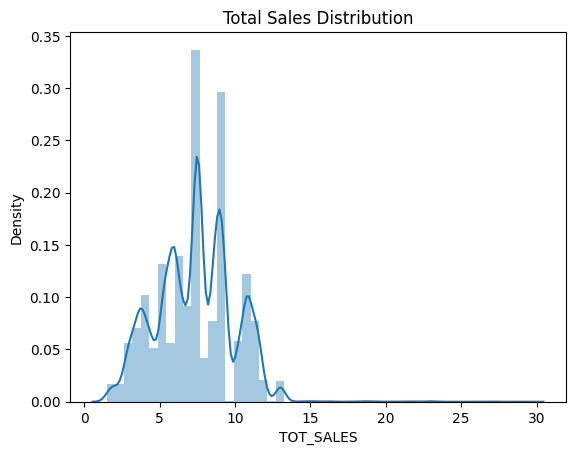

In [26]:
sns.distplot(transaction['TOT_SALES'])
plt.title("Total Sales Distribution")
plt.show()

<ipython-input-27-f75ed626a49d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['PROD_QTY'])


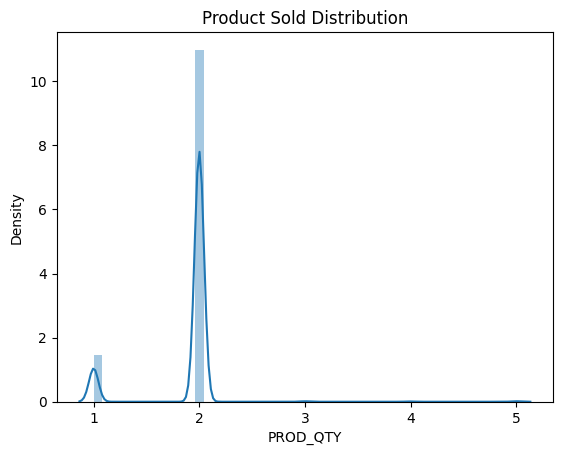

In [27]:
sns.distplot(transaction['PROD_QTY'])
plt.title("Product Sold Distribution")
plt.show()